<a href="https://colab.research.google.com/github/roberth2018/Quantum-Machine-Learning/blob/main/QML_Kulatilake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Multidimensional Quantum machine learning model for predicting fragmentation by Rock Blasting  (Still not finished)

In [ ]:
pip install numba==0.49.1

In [ ]:
pip install pennylane-qulacs[gpu]

In [ ]:
pip install tensornetwork==0.3

In [ ]:
pip install cmake

In [ ]:
#!pip uninstall pennylane pennylane-sf -y


!pip install pennylane-qulacs[gpu] #pennylane-sf 

import pennylane
dev = pennylane.device('qulacs.simulator', wires=14, gpu=True)

In [ ]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.optimize import AdamOptimizer, GradientDescentOptimizer
from pandas import read_csv
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [ ]:
# Importing the dataset

blast = read_csv('/content/kulatilake1.csv', header=0)

#transforming data
from sklearn import preprocessing

mm_scaler = preprocessing.MinMaxScaler()
data = mm_scaler.fit_transform(blast)

print(data.shape)

X = data[:, 0:7]
#X=2*X-1
Y = data[:, 7]
#Y=2*Y-1
xtr, xt, ytr, yt = train_test_split(X, Y, test_size=0.3)

(103, 8)


In [ ]:
def statepreparation(x0, x1, x2, x3, x4, x5, x6, nqbits):

    qml.RY(x0, wires=[0])
    qml.RZ(x0, wires=[0])
    qml.RY(x1, wires=[1])
    qml.RZ(x1, wires=[1])
    qml.RY(x2, wires=[2])
    qml.RZ(x2, wires=[2])
    qml.RY(x3, wires=[3])
    qml.RZ(x3, wires=[3])
    qml.RY(x4, wires=[4])
    qml.RZ(x4, wires=[4])
    qml.RY(x5, wires=[5])
    qml.RZ(x5, wires=[5])
    qml.RY(x6, wires=[6])
    qml.RZ(x6, wires=[6])
    #copy of encodings
    qml.RY(x0, wires=[7])
    qml.RZ(x0, wires=[7])
    qml.RY(x1, wires=[8])
    qml.RZ(x1, wires=[8])
    qml.RY(x2, wires=[9])
    qml.RZ(x2, wires=[9])
    qml.RY(x3, wires=[10])
    qml.RZ(x3, wires=[10])
    qml.RY(x4, wires=[11])
    qml.RZ(x4, wires=[11])
    qml.RY(x5, wires=[12])
    qml.RZ(x5, wires=[12])
    qml.RY(x6, wires=[13])
    qml.RZ(x6, wires=[13])
    
    for q in range(nqbits-1):
        qml.CNOT(wires=[q, q+1])
    
    qml.CNOT(wires=[nqbits-1, 0])
    
    qml.RY(x0, wires=[0])
    qml.RZ(x0, wires=[0])
    qml.RY(x1, wires=[1])
    qml.RZ(x1, wires=[1])
    qml.RY(x2, wires=[2])
    qml.RZ(x2, wires=[2])
    qml.RY(x3, wires=[3])
    qml.RZ(x3, wires=[3])
    qml.RY(x4, wires=[4])
    qml.RZ(x4, wires=[4])
    qml.RY(x5, wires=[5])
    qml.RZ(x5, wires=[5])
    qml.RY(x6, wires=[6])
    qml.RZ(x6, wires=[6])
    #copy of encodings
    qml.RY(x0, wires=[7])
    qml.RZ(x0, wires=[7])
    qml.RY(x1, wires=[8])
    qml.RZ(x1, wires=[8])
    qml.RY(x2, wires=[9])
    qml.RZ(x2, wires=[9])
    qml.RY(x3, wires=[10])
    qml.RZ(x3, wires=[10])
    qml.RY(x4, wires=[11])
    qml.RZ(x4, wires=[11])
    qml.RY(x5, wires=[12])
    qml.RZ(x5, wires=[12])
    qml.RY(x6, wires=[13])
    qml.RZ(x6, wires=[13])
    
    for q in range(nqbits-1):
        qml.CNOT(wires=[q, q+1])
    
    qml.CNOT(wires=[nqbits-1, 0])
#theta0=theta[0][1][2]        
#len(theta[0][1][2])    
def layer(theta):
    nqbits=len(theta[0])
    nlayer=len(theta)
    
    for l in range(nlayer):
        
        for i in range(nqbits-1):
            qml.CNOT(wires=[i, i+1])
        qml.CNOT(wires=[nqbits-1, 0])
        for q in range(nqbits):
            theta0=theta[l][q][0]
            theta1=theta[l][q][1]
            theta2=theta[l][q][2]
            qml.RX(theta0, wires=[q])
            qml.RZ(theta1, wires=[q])
            qml.RX(theta2, wires=[q])
        

In [ ]:
dev = qml.device("qulacs.simulator", wires=14, gpu=True)
nqbits=2*len(xt[0])
#dev = qml.device('default.tensor.tf', wires=nqbits)  
  
@qml.qnode(dev)
def qcircuit(theta, x0, x1, x2, x3,
             x4, x5, x6):
    measure=[]
    nqbits=len(theta[0])
    statepreparation(x0, x1, x2, x3, x4, x5, x6, nqbits)
    layer(theta)
    for q in range(nqbits):
        zeta=qml.expval(qml.PauliZ([q]))
        measure.append(zeta)
    return measure
#n=qcircuit(theta, xtr[0][0], xtr[0][1], xtr[0][2], xtr[0][3],
             #xtr[0][4], xtr[0][5], xtr[0][6])  #len(n.shape)

def square_loss(labels, predictions):
    loss = 0
    for l, p in zip(labels, predictions):
        loss = loss + (l - p) ** 2

    loss = loss / len(labels)
    return loss

def lparam(m, fz, y):
    mq=np.array(m) #orden nxfz
    beta1=np.matmul(np.linalg.inv(np.matmul(np.transpose(mq),mq )),np.transpose(mq))
    betas=np.matmul(beta1,y)
    return betas


def betas_model(theta,x0,x1,x2,x3,x4,x5,x6,y, fz):
    measure=[]
    for i in range(len(x1)):
        m=qcircuit(theta, x0[i],x1[i],x2[i],x3[i],x4[i],x5[i],x6[i])
        measure.append(m)
    mq=measure
    betas=lparam(mq, fz, y)
    return betas

def predictor(theta,x0,x1,x2,x3,x4,x5,x6,fz,betas):
    m=qcircuit(theta, x0,x1,x2,x3,x4,x5,x6)
    m=m[0:fz]
    
    matriz_pr=[]
    for i in range(fz):
        pr=m[i]*betas[i]
        matriz_pr.append(pr)
    pred=np.sum(matriz_pr)
    
    return pred
#veta[0]
#iu=predictor(theta,xtr[0,0],xtr[0,1],xtr[0,2],xtr[0,3],xtr[0,4],xtr[0,5],xtr[0,6],fz,veta)
#iu=np.array(iu)
def total_cost(theta,x,y,fz):
    x0=x[:,0]
    x1=x[:,1]
    x2=x[:,2]
    x3=x[:,3]
    x4=x[:,4]
    x5=x[:,5]
    x6=x[:,6]
    betas=betas_model(theta,x0,x1,x2,x3,x4,x5,x6,y,fz)
    predi=[]
    for i in range(len(x0)):
        pred=predictor(theta,x0[i],x1[i],x2[i],x3[i],x4[i],x5[i],x6[i],fz,betas)
        predi.append(pred)
    predic=predi
    res=square_loss(y, predic)
    #proto_tensor = tf.make_tensor_proto(res)
    #res=tf.make_ndarray(proto_tensor)
    #res=res[0][0]
    
    return res

NameError: ignored

In [ ]:
opt = AdamOptimizer(0.01, beta1=0.9, beta2=0.999)

num_qubits = 2*len(xt[0])
num_layers = 3
fz=14
theta_init = (0.01 * np.random.randn(num_layers, num_qubits, 3))



In [ ]:
print(theta_init)
theta = theta_init

In [ ]:
for it in range(1):
    theta = opt.step(lambda v: total_cost(v, xtr, ytr, fz), theta)
    print("Iter: {:5d} | Cost: {:0.8f} ".format(it + 1, total_cost(theta, xtr, ytr,fz)))


Estadístico R_2: 0.42
Error cuadrático medio: 0.03


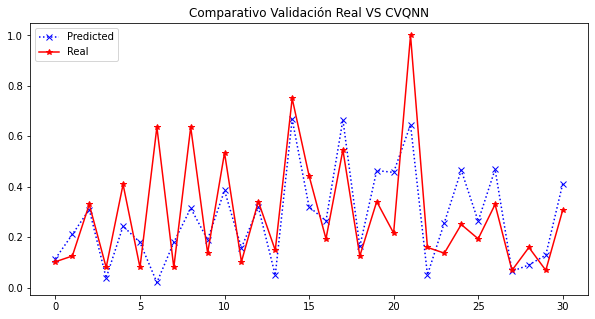

In [ ]:
#prediction test
betas=betas_model(theta,xtr[:,0],xtr[:,1],xtr[:,2],xtr[:,3],xtr[:,4],xtr[:,5],xtr[:,6],ytr,fz) 
predics =[]
for i in range(len(xt)):
    p=predictor(theta,xt[i,0],xt[i,1],xt[i,2],xt[i,3],xt[i,4],xt[i,5],xt[i,6],fz,betas) 
    predics.append(p)
    
    
    
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
#plt.plot(predics)
plt.plot(predics, marker="x", linestyle=':', color='b', label="Predicted")
plt.plot(yt, marker='*', linestyle='-', color='r', label ="Real")
plt.legend(loc="upper left")
plt.title('Comparativo Validación Real VS CVQNN')

from sklearn.metrics import mean_squared_error, r2_score
# Por último, calculamos el error cuadrático medio y el estadístico R^2
print( u'Estadístico R_2: %.2f' % r2_score(yt, predics))
print( u'Error cuadrático medio: %.2f' % mean_squared_error(yt, predics))



In [ ]:
print(theta)

[[[ 0.02181269  0.01911697  0.01273632]
  [-0.02981751 -0.03715682 -0.02157594]
  [-0.00544543  0.00156251 -0.01227777]
  [-0.02004572  0.05212464 -0.02107735]
  [-0.0047932   0.06048518  0.02058017]
  [ 0.01769026  0.02354195  0.0161058 ]
  [ 0.00170229  0.03688872  0.02906443]
  [ 0.03594132  0.03302265  0.02457917]
  [ 0.0233495   0.0504489   0.01836766]
  [ 0.01909437  0.02976896  0.0241153 ]
  [ 0.01557108 -0.01646412  0.00872197]
  [ 0.02682324  0.02969322 -0.00426994]
  [-0.0382521   0.03476903 -0.02958268]
  [-0.02603323  0.02071231 -0.01765647]]]


In [ ]:
theta_data = theta.to_csv(index=False)